In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt

# set the CARMA model parameters
sigmay = 2.3  # dispersion in the time series
p = 5  # order of the AR polynomial
mu = 17.0  # mean of the time series
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0])  # widths of of Lorentzian components
qpo_cent = np.array([1.0/5.0, 1.0/25.0])  # centroids of Lorentzian components
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) # compute the roots r_k from the Lorentzian function parameters
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
# convert CARMA model variance to variance in the driving white noise
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)  # carma_variance computes the autcovariance function

Text(0,0.5,'magnitud')

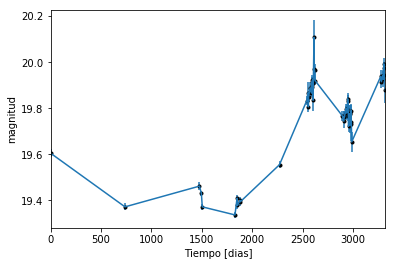

In [2]:
data = np.genfromtxt('LC_G_141827.dat')
juldate = data[:,0]  # time is given by the julian date
t = juldate - juldate.min()  # set first time value to zero for convenience. units of t are days.
y = data[:,1]  # i-band magnitudes
yerr = data[:,2]  # standard deviation in the measurement noise

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

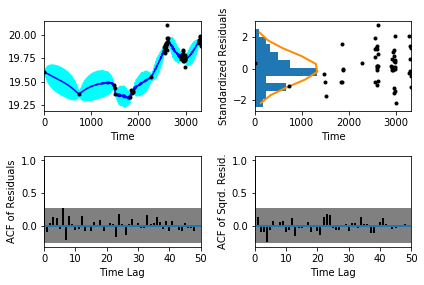

In [5]:
sample.assess_fit()

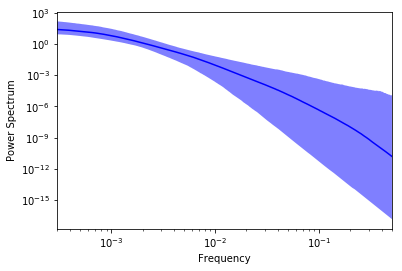

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)


Text(0.000376389,0.0736159,'Nivel de ruido')

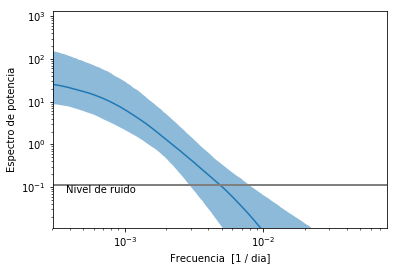

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia')
plt.xlabel('Frecuencia  [1 / dia]')
plt.annotate("Nivel de ruido", (1.25* plt.xlim()[0], noise_level / 1.5))

In [9]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [10]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [11]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 208.367162021
Median: 0.0361751065133
Standard deviation: 0.263395164486
68% credibility interval: [ 0.          0.47593566]
95% credibility interval: [ 0.          0.89250987]
99% credibility interval: [ 0.          0.99007765]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 208.367162021
Median: 0.0361751065133
Standard deviation: 0.263395164486
68% credibility interval: [ 0.          0.47593566]
95% credibility interval: [ 0.          0.89250987]
99% credibility interval: [ 0.          0.99007765]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 568.119597261
Median: 0.0
Standard deviation: 0.000262095888905
68% cr

Plotting parameter summary


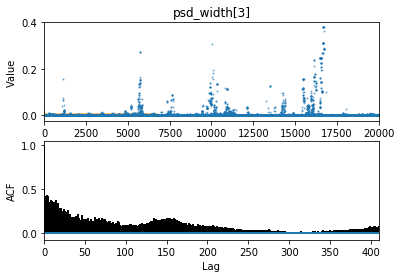

In [12]:
sample.plot_parameter('psd_width', 3, doShow=True)

In [13]:
centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [14]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 670.579281874
Median: 107.203342777
Standard deviation: 1.72408229417
68% credibility interval: [ 105.27942145  108.49785204]
95% credibility interval: [ 102.77110836  109.60212925]
99% credibility interval: [ 100.79597026  110.1235821 ]


In [15]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 5)

In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 342.866821457
Median: 0.625544654374
Standard deviation: 2.12744047234
68% credibility interval: [ 0.05174041  3.64686285]
95% credibility interval: [ 0.01400124  7.68026167]
99% credibility interval: [  9.88344636e-03   1.04709790e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 340.231460707
Median: 0.686119039809
Standard deviation: 9.33457353086
68% credibility interval: [  0.03147772  12.31814464]
95% credibility interval: [  1

In [19]:
centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 2)

In [20]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2349.87884559
Median: 3.37254549573e-29
Standard deviation: 4.48965684195e+74
68% credibility interval: [  7.05280761e-78   3.28873743e-04]
95% credibility interval: [  1.93063427e-126   7.79928168e+001]
99% credibility interval: [  2.07569288e-132   6.88454000e+072]


In [21]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [22]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2508.50280775
Median: 19.6102344227
Standard deviation: 0.122929168872
68% credibility interval: [ 19.51091639  19.71384981]
95% credibility interval: [ 19.36733453  19.86317759]
99% credibility interval: [ 19.20976018  20.00804044]


In [23]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [24]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 208.367162021
Median: 0.0361751065133
Standard deviation: 0.263395164486
68% credibility interval: [ 0.          0.47593566]
95% credibility interval: [ 0.          0.89250987]
99% credibility interval: [ 0.          0.99007765]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 208.367162021
Median: 0.0361751065133
Standard deviation: 0.263395164486
68% credibility interval: [ 0.          0.47593566]
95% credibility interval: [ 0.          0.89250987]
99% credibility interval: [ 0.          0.99007765]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 568.119597261
Median: 0.0
Standard deviation: 0.000262095888905
68% cr

In [25]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [26]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 670.579281874
Median: 107.203342777
Standard deviation: 1.72408229417
68% credibility interval: [ 105.27942145  108.49785204]
95% credibility interval: [ 102.77110836  109.60212925]
99% credibility interval: [ 100.79597026  110.1235821 ]


In [27]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 4)

In [28]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 256.436641471
Median: 0.0152039379002
Standard deviation: 0.200051509862
68% credibility interval: [ 0.00108211  0.23655219]
95% credibility interval: [  3.67299334e-04   7.81814583e-01]
99% credibility interval: [  3.11058200e-04   9.35427456e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 250.616520947
Median: 0.00315206809116
Standard deviation: 0.0917503376965
68% credibility interval: [ 0.00053952  0.04982243]
95% credibility interval: [ 0.00032959  0.32147333]
99% credibility interval: [  3.07480546e-04   5.96723824e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 424.115928857
Median: 0.0162798077158
Standard 

In [29]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [30]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1542.9821366
Median: 0.0510893973855
Standard deviation: 0.0744441804958
68% credibility interval: [ 0.02988386  0.10262431]
95% credibility interval: [ 0.01987298  0.23776513]
99% credibility interval: [ 0.01594923  0.44391168]


In [31]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [32]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 455.295622168
Median: 1.20375597381
Standard deviation: 0.211750772945
68% credibility interval: [ 1.00812285  1.42401116]
95% credibility interval: [ 0.83881687  1.67219418]
99% credibility interval: [ 0.74372532  1.85193445]


In [33]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [34]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 368.357097756
Median: 0.000284602383456
Standard deviation: 0.128215486999
68% credibility interval: [  6.83603381e-06   1.72441176e-02]
95% credibility interval: [  1.00534883e-07   2.95498633e-01]
99% credibility interval: [  8.23175942e-77   7.91005601e-01]


In [36]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 4)

In [37]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 256.436641471
Median: (-0.0955291592261-2.02958283456j)
Standard deviation: 2.07818307629
68% credibility interval: [-1.48630125+0.j         -0.00679907-0.00376655j]
95% credibility interval: [ -4.91228590e+00-0.07488097j  -2.30780978e-03-0.02931748j]
99% credibility interval: [ -5.87746405e+00+0.j          -1.95443631e-03-0.15059961j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 250.616520947
Median: (-0.0198050279176+0j)
Standard deviation: 1.75249220018
68% credibility interval: [-0.31304355 +6.00773829e+00j -0.00338990 +3.70484247e-03j]
95% credibility interval: [-2.01987650+3.51014768j -0.00207088+0.j        ]
99% credibility interval: [ -3.74932636e+00+3.92378626j  -1.93195725e-03+3.6875121j ]
Posterior summar

Plotting 2d PDF w KDE


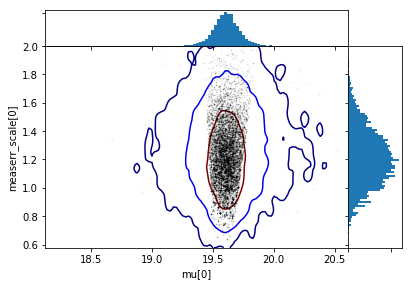

In [38]:
sample.plot_2dkde('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


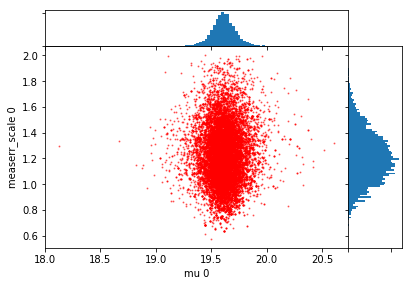

In [39]:
sample.plot_2dpdf('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


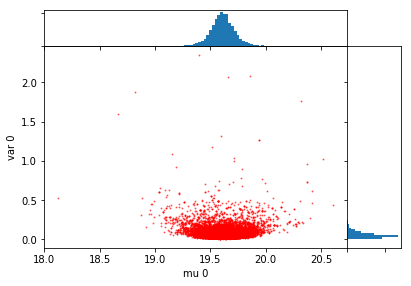

In [40]:
sample.plot_2dpdf('mu', 'var', doShow=True)

Plotting 2d PDF w KDE


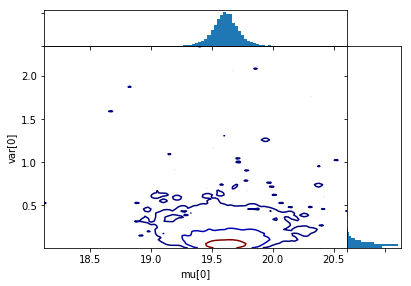

In [41]:
sample.plot_2dkde('mu', 'var', doShow=True)

Text(0.5,1,'Interpolacion, camino simulado')

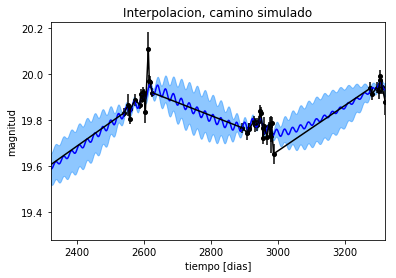

In [47]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

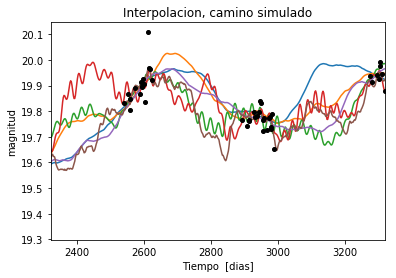

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 6
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')